# Calculations for Missile Launch Acceleration
Last update: 21 Sept 2017

**Synopsis:**  This notebook will calculate the launch acceleration of missile launched horizontally from an aircraft.

**Abstract:** 

**Introduction:** The launch acceleration is an important parameter for the arming environment of safe and arm devices.  This study will explore the launch acceleration for a rail launched missile.  Acceleration at a basic level is force divided by mass.  Force is supplied by the rocket motor and the mass is the weight of the missile.  The rocket motor thrust is reduced by drag, static and dynamic friction.  

**Variables used:**
- alt: array of altitude 0 to 50,000, in meters
- rho: array of pressure in pa, as a function of altitude
- T: array of temperature in C,  as a function of altitude
- air_density: array of air density g/m^3, as a function of altitude

**Scope:** These calculations are primarily for rail launched missile.  Rocket motor thrust is considered a step function at t=0.  Drag coefficient versus mach number is a educated guess based on various inputs from the internet.  Calculations cover the following ranges: Altitude can range from 0 to 50,000 meters and mach number can range from .25 to 2.  Standard dry air is assumed.

**Analysis method:**  Need to build the model up from basics.  Rick's calculations has no derivation, so I'm starting from some basic levels. At a given a altitude and MACH:
- find the density of air
    - find temperature and pressure as a function of altitude
    - find density
- find the velocity of sound
- find the drag force
- calculate the acceleration

need to look at units to make sure they agree.


**General background:**


#### email from Anthony

Do you mean it's clear to everyone that the threshold was met? I assume the umbilical will separate no matter what if it launches slower or faster.

Anyways, yeah that's not hard, you can use the equations of motion (http://www.physicsclassroom.com/class/1DKin/Lesson-6/Kinematic-Equations) that give you distance based off acceleration.

d=v_i*t + (1/2)*a*t^2

In this case v_i = 0 and t = 1 and a = 6.5g = 63.7m/s^2 so you get 31.85 meters in the first second as the distance traveled if it was doing 6.5Gs.

Let me know if that's what you were looking for or if you wanted something else.

If you want it in actual rocket motor thrust, then you're gonna have to give me the weight of the missile and whether or not the thing takes off vertically or at an angle. But that's easily doable too.

-Anthony

## Density of air
The [density of air](https://en.wikipedia.org/wiki/Density_of_air) ρ (Greek: rho) (air density) is the mass per unit volume of Earth's atmosphere. Air density, like air pressure, decreases with increasing altitude. It also changes with variation in temperature and humidity. At sea level and at 15 °C air has a density of approximately 1.225 kg/m3 (1.225 x10−3 g/cm3, 0.0023769 slug/(cu ft), 0.0765 lb/(cu ft)) according to ISA (International Standard Atmosphere).

To calculate the density of air as a function of altitude, one requires additional parameters. They are listed below, along with their values according to the International Standard Atmosphere, using for calculation the universal gas constant instead of the air specific constant:

$p_0$ = sea level standard atmospheric pressure, 101.325 kPa
$T_0$ = sea level standard temperature, 288.15 K
g = earth-surface gravitational acceleration, 9.80665 m/s2
L= temperature lapse rate, 0.0065 K/m
R = ideal (universal) gas constant, 8.31447 J/(mol·K)
M = molar mass of dry air, 0.0289644 kg/mol

Density can then be calculated according to a molar form of the ideal gas law:

$\rho = \frac{p M}{R T}$

where:
- M = molar mass
- R = ideal gas constant
- T = absolute temperature
- p = absolute pressure

## Earth's atmosphere
The Earth's atmosphere is an extremely thin sheet of air extending from the surface of the Earth to the edge of space. If the Earth were the size of a basketball, a tightly held pillowcase would represent the thickness of the atmosphere. Gravity holds the atmosphere to the Earth's surface. Within the atmosphere, very complex chemical, thermodynamic, and fluid dynamics effects occur. The atmosphere is not uniform; fluid properties are constantly changing with time and place. We call this change the weather.

Standard Atmosphere: p0 = 101.325 kPa, T0 = 288.15 K, ρ0 = 1.225 kg/m3

The [model](https://www.grc.nasa.gov/www/k-12/airplane/atmosmet.html) has three zones with separate curve fits for the troposphere, the lower stratosphere, and the upper stratosphere.

http://acmg.seas.harvard.edu/people/faculty/djj/book/bookchap2.html



### Troposphere
The troposphere runs from the surface of the Earth to 11,000 meters. In the troposphere, the temperature decreases linearly and the pressure decreases exponentially. The rate of temperature decrease is called the lapse rate. For the temperature T and the pressure p, the metric units curve fits for the troposphere are:

$$T = 15.04 - .00649 * h$$

$$p = 101.29 * [(T + 273.1)/288.08]^{5.256}$$

where the temperature is given in Celsius degrees, the pressure in kilo-Pascals,and h is the altitude in meters.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
alt1 = np.linspace(0, 10000, num=10, endpoint=True) #altitude from 0 to 10km
T1 =  15.04 - .00649 * alt1  # lapse rate, units of degrees C
rho1 = 101.29 * ((T1 + 273.1)/288.08)**5.256  # pressure as a function of temperature, units of kPa

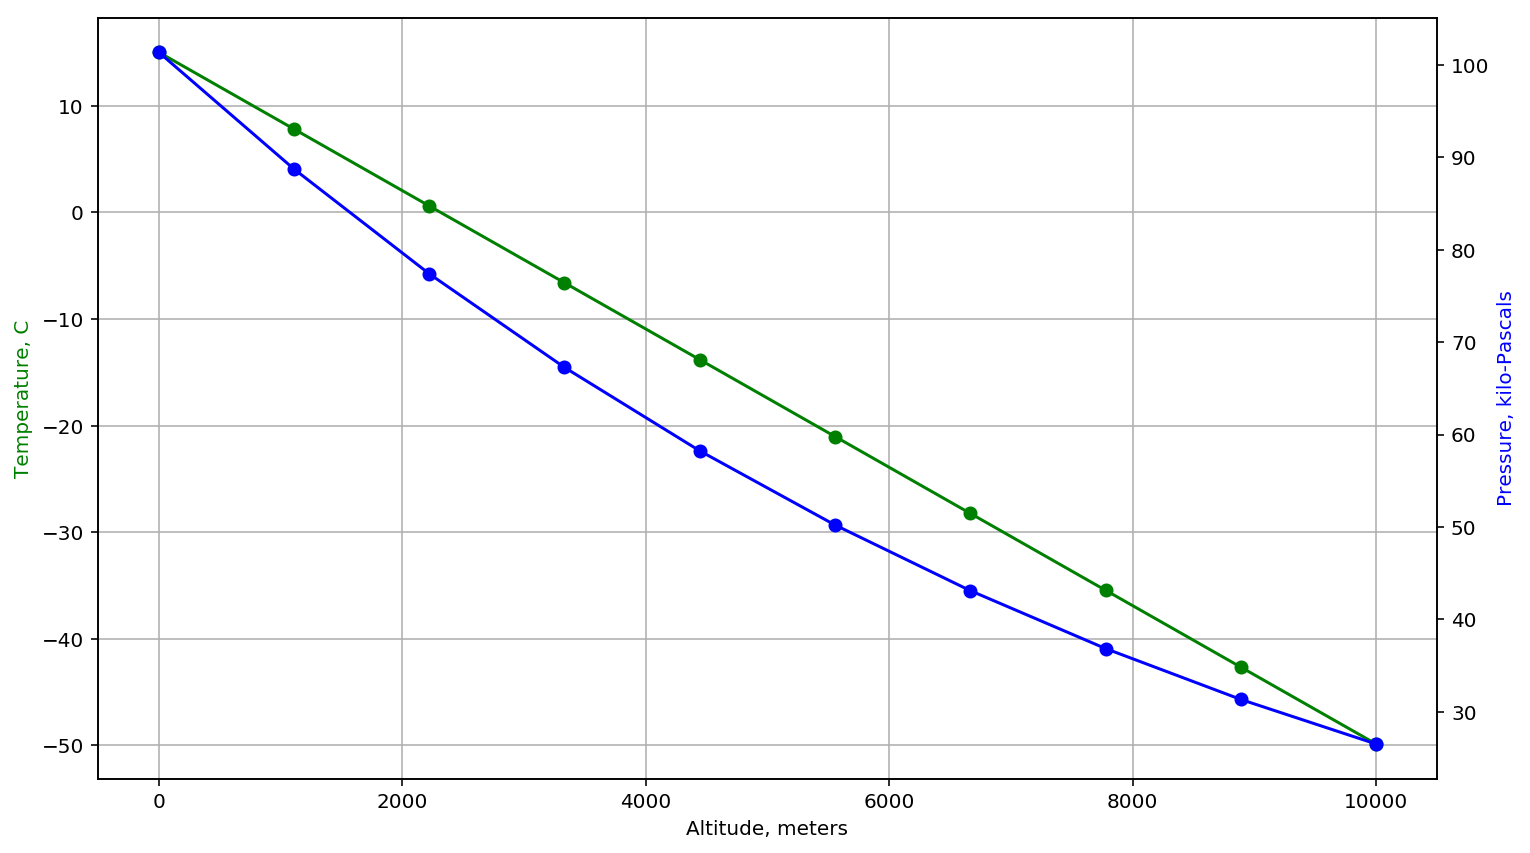

In [19]:
# plot the data
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(alt1, T1,'g-o')
ax2.plot(alt1, rho1,'b-o')
ax1.set_xlabel('Altitude, meters')
ax1.set_ylabel('Temperature, C', color='g')
ax2.set_ylabel('Pressure, kilo-Pascals', color='b')
ax1.grid()
#ax2.grid()
plt.show()

### Lower Stratosphere
The lower stratosphere runs from 11,000 meters to 25,000 meters. In the lower stratosphere the temperature is constant and the pressure decreases exponentially. The metric units curve fits for the lower stratosphere are:

T = -56.46

p = 22.65 * exp(1.73 - .000157 * h)


In [22]:
alt2 = np.linspace(11000, 25000, num=10, endpoint=True)
T2 =  np.ones(len(alt2))*-56.46  # a constant
rho2 = 22.65 * np.exp(1.73 - .000157 * alt2)

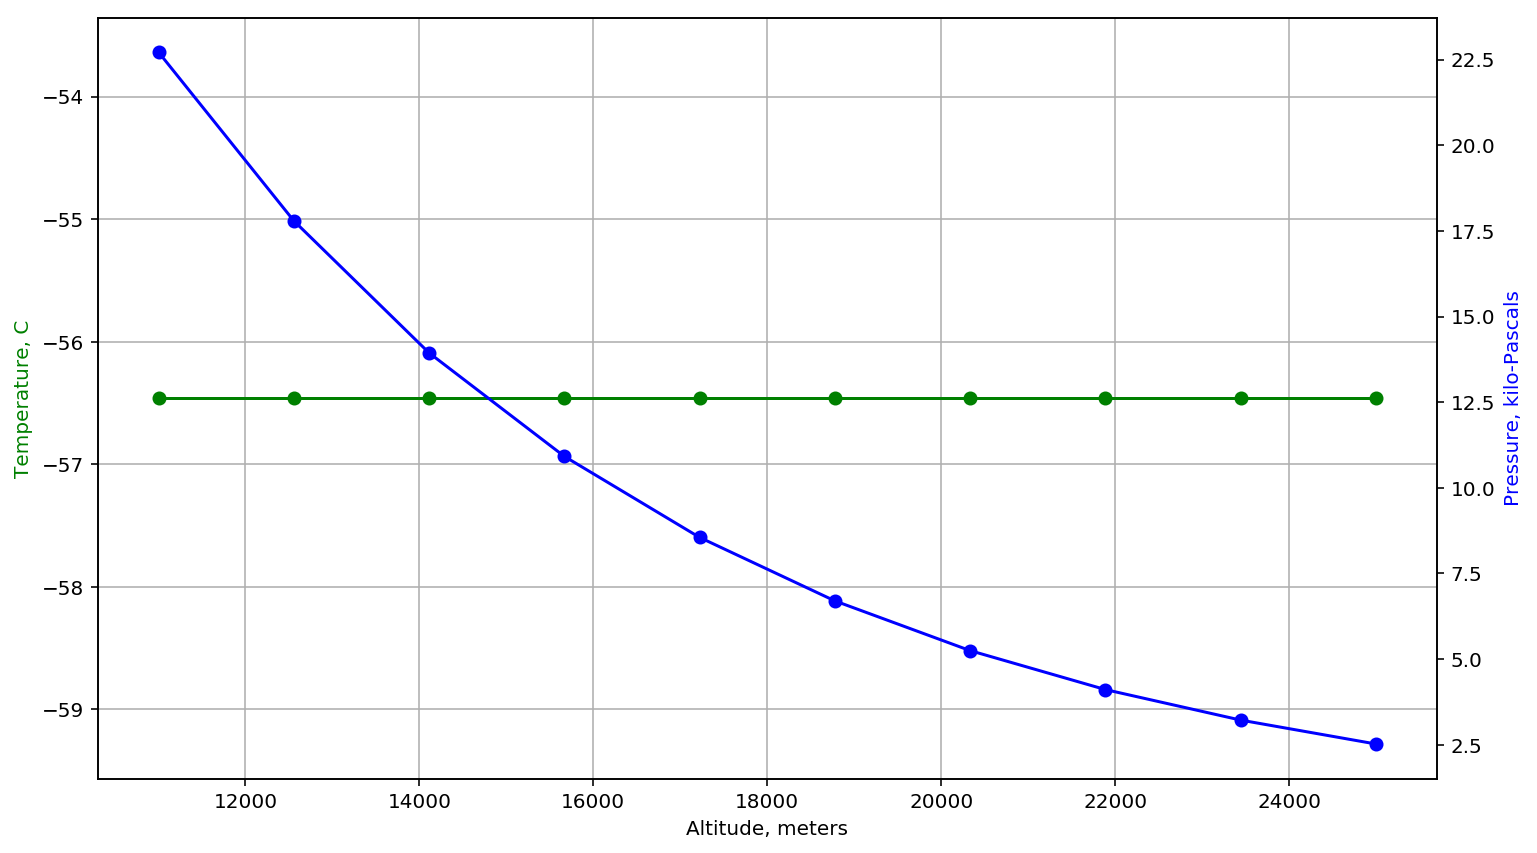

In [23]:
# plot the data
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(alt2, T2,'g-o')
ax2.plot(alt2, rho2,'b-o')
ax1.set_xlabel('Altitude, meters')
ax1.set_ylabel('Temperature, C', color='g')
ax2.set_ylabel('Pressure, kilo-Pascals', color='b')
ax1.grid()
#ax2.grid()
plt.show()

### Upper Stratosphere to 50,000 meters
The upper stratosphere model is used for altitudes above 25,000 meters. In the upper stratosphere the temperature increases slightly and the pressure decreases exponentially. The metric units curve fits for the upper stratosphere are:

T = -131.21 + .00299 * h

p = 2.488 * [(T + 273.1)/ 216.6]^-11.388

In each zone the density r is derived from the equation of state.

r = p / [.2869 * (T + 273.1)]

In [24]:
alt3 = np.linspace(25000, 50000, num=10, endpoint=True)
T3 = -131.21 + 0.00299 * alt3
rho3 = 2.488 * ((T3 + 273.1)/ 216.6)**-11.388

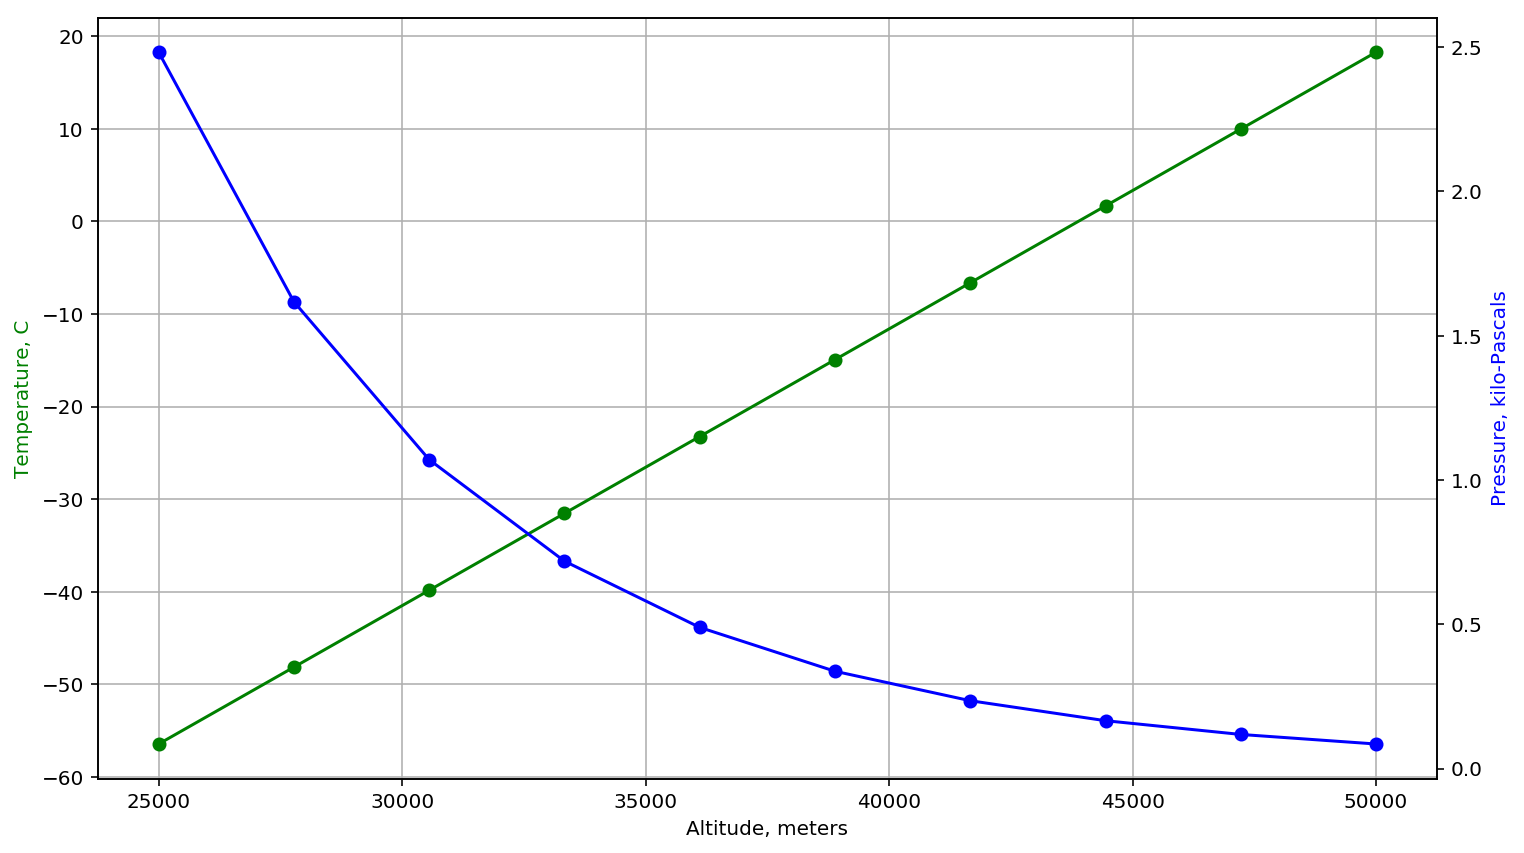

In [25]:
# plot the data
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(alt3, T3,'g-o')
ax2.plot(alt3, rho3,'b-o')
ax1.set_xlabel('Altitude, meters')
ax1.set_ylabel('Temperature, C', color='g')
ax2.set_ylabel('Pressure, kilo-Pascals', color='b')
ax1.grid()
#ax2.grid()
plt.show()

### put the segments together

In [28]:
T = np.concatenate((T1,T2,T3))
rho = np.concatenate((p1,p2,p3))
alt = np.linspace(0, 50000, num=30, endpoint=True)

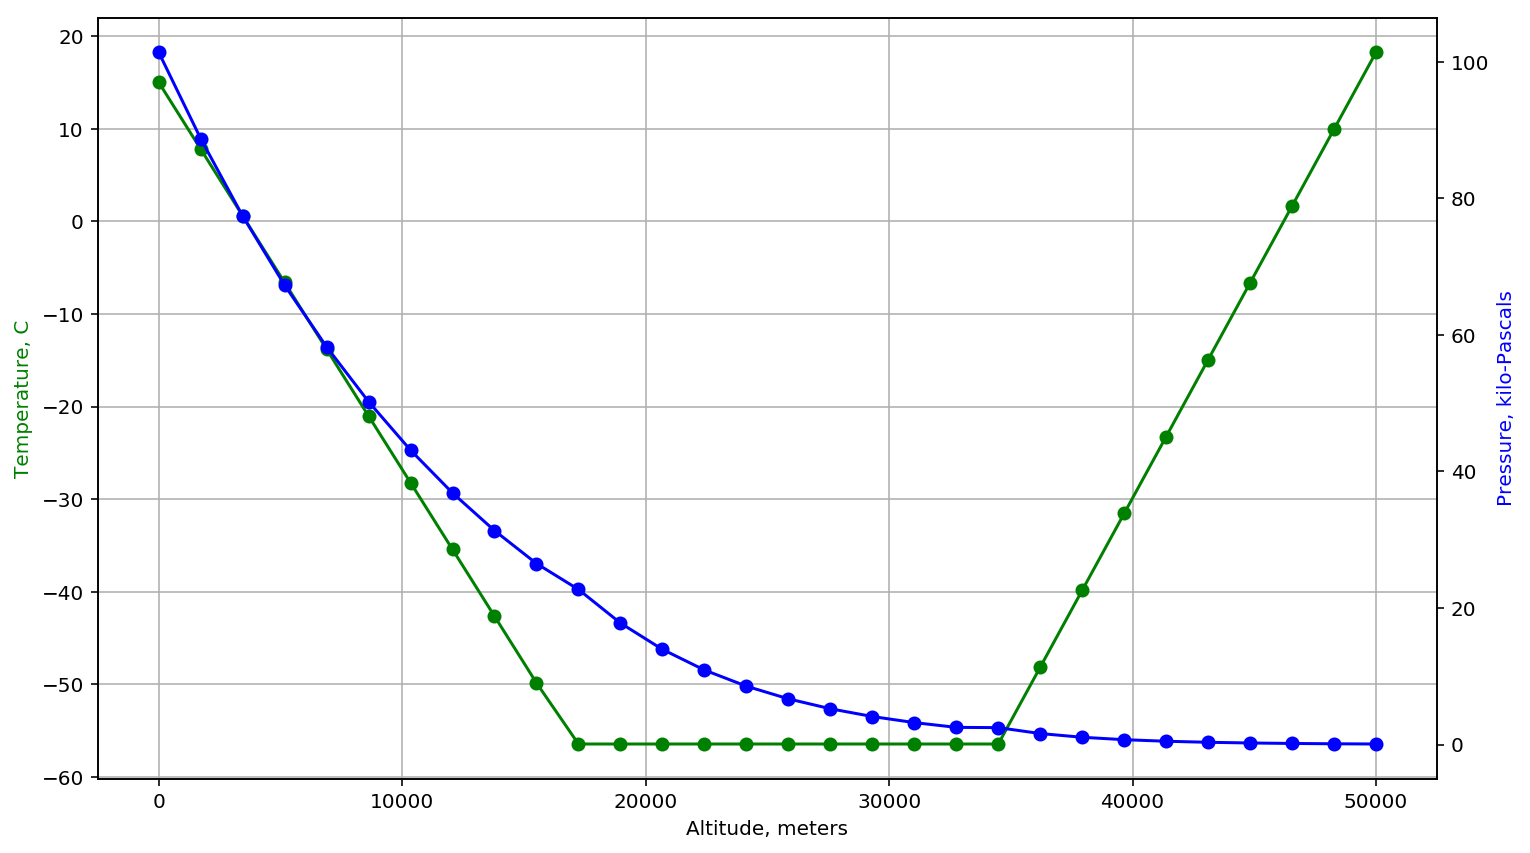

In [29]:
# plot the data
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(alt, T,'g-o')
ax2.plot(alt, rho,'b-o')
ax1.set_xlabel('Altitude, meters')
ax1.set_ylabel('Temperature, C', color='g')
ax2.set_ylabel('Pressure, kilo-Pascals', color='b')
ax1.grid()
#ax2.grid()
plt.show()

### Molar mass of dry air
In chemistry, the molar mass M is a physical property defined as the mass of a given substance (chemical element or chemical compound) divided by the amount of substance. The base SI unit for molar mass is kg/mol. However, for historical reasons, molar masses are almost always expressed in g/mol. The molecular weight (or molar mass) of a substance is the mass of one mole of the substance, and can be calculated by summarizing the molar masses of all the atoms in the molecule.

**Components in Dry Air:**  Air is a mixture of several gases, where the two most dominant components in dry air are oxygen and nitrogen. Oxygen has a molar mass of 16 g/mol and nitrogen has a molar mass of 14 g/mol. Since both of these elements are diatomic in air - O2 and N2, the molar mass of oxygen is 32 g/mol and the molar mass of nitrogen is 28 g/mol.  The average molar mass is equal to the sum of the mole fractions of each gas multiplied by the molar mass of that particular gas:

$M_{mixture} = (x_1*M_1 + ......+ x_n*M_n)$

where
- $x_i$ = mole fractions of each gas
- $M_i$ = the molar mass of each gas


| Components in Dry Air | Volume Ratio compared to Dry Air | Molar Mass M (g/mol) |
|-----------------------|----------------------------------|----------------------|
| Oxygen | 0.2095 | 32.00 |
| Nitrogen | 0.7809 |28.02 |
| Carbon dioxide | 0.0003 | 44.01 |
| Hydrogen | 0.0000005 | 2.02 |
| Argon | 0.00933 | 39.94 |
| Neon | 0.000018 | 20.18 |
| Helium | 0.000005 | 4.00 |
| Krypton | 0.000001 | 83.8 |
| Xenon | 0.09x10-6 | 131.29 |


In [31]:
# make a dataframe for the constituents of dry air
df = pd.DataFrame(columns=['element','Volume Ratio','Molar Mass'])
df.loc[0] = ['Oxygen',0.2095,32.00]
df.loc[1] = ['Nitrogen',0.7809,28.02]
df.loc[2] = ['Carbon dioxide',0.0003,44.01]
df.loc[3] = ['Hydrogen',0.0000005,2.02]
df.loc[4] = ['Argon',0.00933,39.94]
df.loc[5] = ['Neon',0.000018,20.18]
df.loc[6] = ['Helium',0.000005,4.00]
df.loc[7] = ['Krypton',0.000001,83.8]
df.loc[8] = ['Xenon',0.09e-6,131.29]

molar_mass_air = 0
for i in range(len(df)):
    molar_mass_air += df.loc[i,'Volume Ratio']*df.loc[i,'Molar Mass']

print('molar mass of dry air: {:f} g/mol'.format(molar_mass_air))

molar mass of dry air: 28.971141 g/mol


### The ideal gas law
The ideal gas law, also called the general gas equation, is the equation of state of a hypothetical ideal gas. It is a good approximation of the behavior of many gases under many conditions, although it has several limitations. It was first stated by Émile Clapeyron in 1834 as a combination of the empirical Boyle's law, Charles's law and Avogadro's Law. The ideal gas law is often written as

$PV=nRT$

where:
- P is the pressure of the gas
- V is the volume of the gas
- n is the amount of substance of gas (in moles)
- R is the ideal, or universal, gas constant, equal to the product of the Boltzmann constant and the Avogadro constant
- T is the absolute temperature of the gas

density is mass per volume.

$V=nRT/P$

$density = mass/(nRT/P)$

1 unit of mass = 1g

n is in mols

molar mass of air is g/mol

$density = molar mass*P/(RT)$

This form of the ideal gas law is very useful because it links pressure, density, and temperature in a formula independent of the quantity of the considered gas.

The equations that follow use little p for 1 pressure, d for 1 density and t for 1 temperature.

In [39]:
# density of air at one pressure and temperature
p = 60 # absolute pressure, kilo-Pascals
t = -40 # absolute temperature, units of C, need to convert to K when using in equations
# ideal gas constant
k = 1.38064852e-23 # Boltzmann constant, J/T, relates the average kinetic energy in a gas with the temperature of the gas
Na = 6.022140857e23 # Avogadro constant, 1/mol
R = k*Na  # 8.3144598 # ideal gas constant, J/(mol⋅T)
d = (p*1000)*molar_mass_air/(R*(t+273.1))
print('air density at {:,.0f}pa and {:.0f}C is {:.1f} g/m^3'.format(p*1000,t,d))

air density at 60,000pa and -40C is 896.9 g/m^3


### Plotting air density as a function of altitude

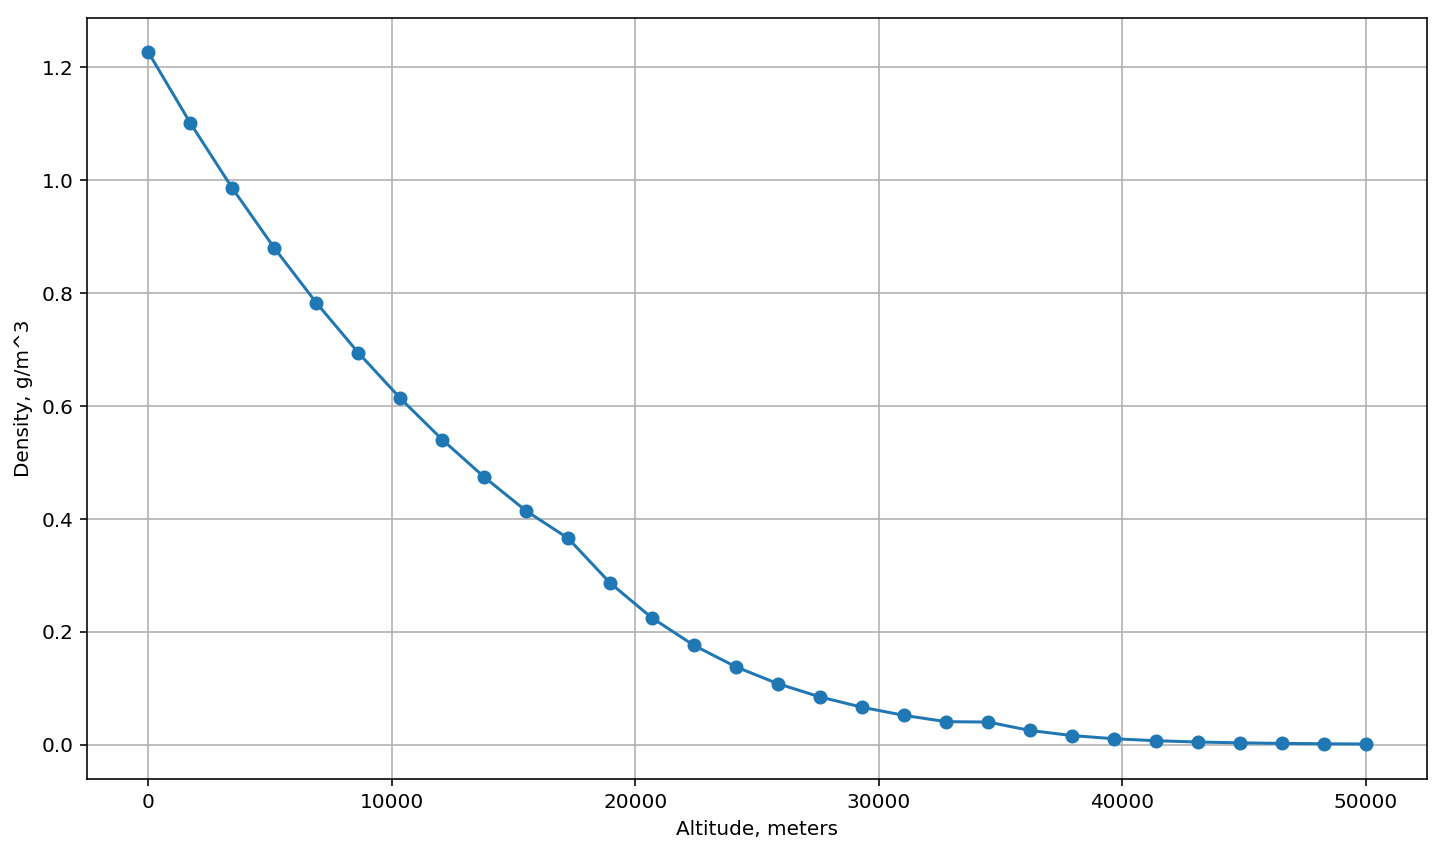

In [40]:
air_density = (rho)*molar_mass_air/(R*(T+273.1))
plt.plot(alt, air_density,'-o')
plt.xlabel('Altitude, meters')
plt.ylabel('Density, g/m^3')
plt.grid()
plt.show()

### Inputs to the model

In [41]:
motor_thrust_lbs = 5000  # Rocket motor thrust in pounds, try 5000 min @ .22 sec
msl_weight_lbs = 783 # Weight of the missile in pounds
d_in = 10 # diameter of the missile, inches
drag_coef = np.array([ 0.25, 0.26, 0.27,  0.3,  0.35 ,  0.4,  0.42, 0.415, 0.4, 0.375, 0.35, 0.325])
mach_num = np.array([ 0.2, 0.36, 0.52, 0.69, 0.85, 1.018, 1.18, 1.345, 1.50, 1.67, 1.836, 2.])

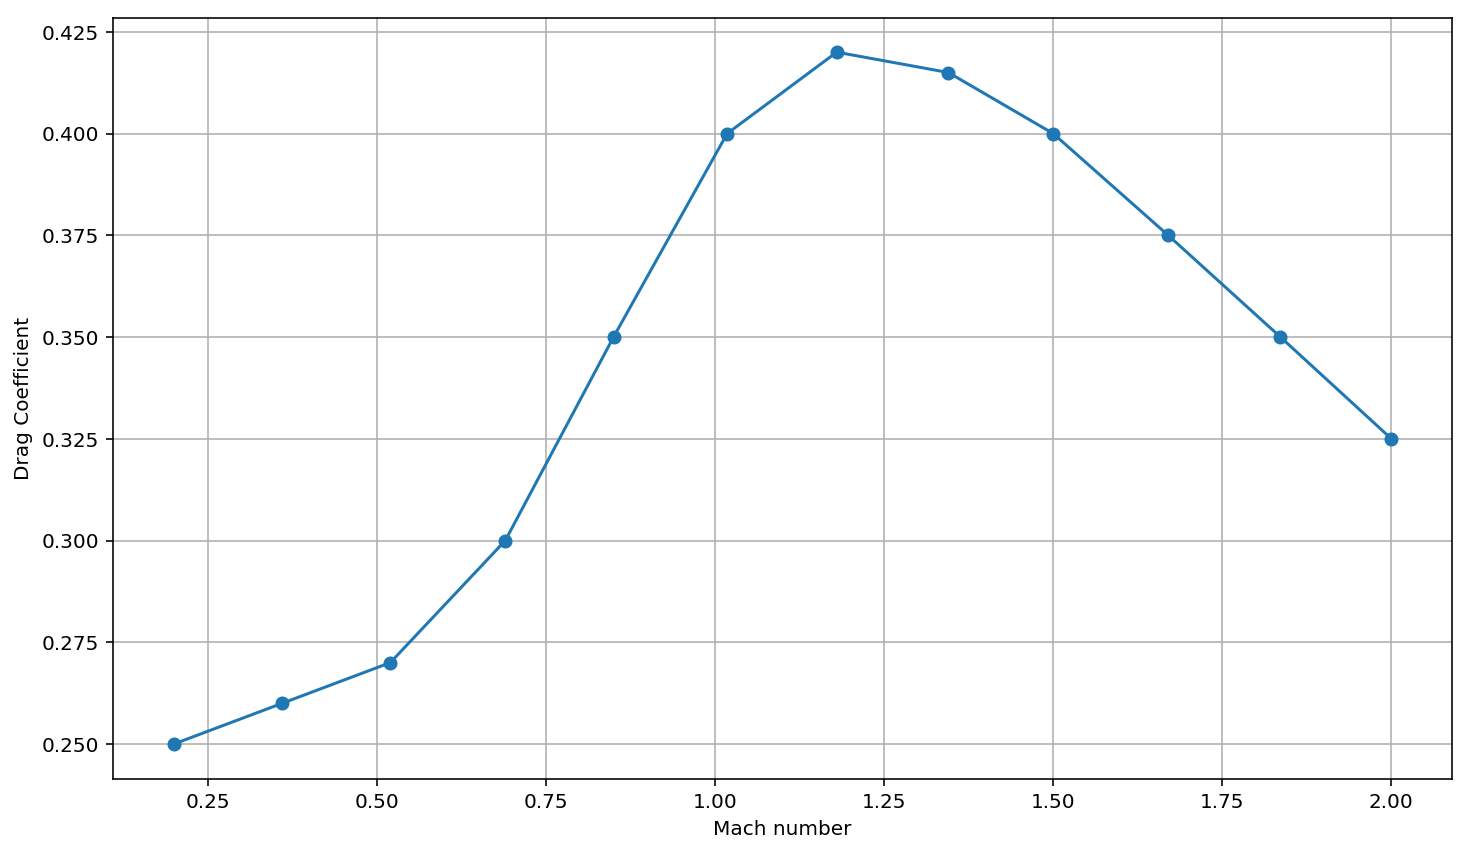

In [43]:
# plot drage coefficients
plt.plot(mach_num, drag_coef,'-o')
plt.xlabel('Mach number')
plt.ylabel('Drag Coefficient')
plt.grid()
plt.show()

## Calculate drag force
In fluid dynamics, the [drag equation](https://en.wikipedia.org/wiki/Drag_equation) is a formula used to calculate the force of drag experienced by an object due to movement through a fully enclosing fluid. The formula is accurate only under certain conditions: the objects must have a blunt form factor and the system must have a large enough Reynolds number to produce turbulence behind the object. The equation is:

$F_{D}\,=\,{\tfrac  12}\,\rho \,u^{2}\,C_{D}\,A$

- $F_{D}$ is the drag force, which is by definition the force component in the direction of the flow velocity
- $\rho$  is the mass density of the fluid
- u is the flow velocity relative to the object
- A is the reference area
- $C_{D}$ is the drag coefficient – a dimensionless coefficient related to the object's geometry and taking into account both skin friction and form drag, in general $C_{D}$ depends on the Reynolds number.

The reference area A is typically defined as the area of the orthographic projection of the object on a plane perpendicular to the direction of motion. For non-hollow objects with simple shape, such as a sphere, this is exactly the same as a cross sectional area.

### calculate drag force and acceleration at one Mach number and altitude

In [45]:
# some test code
M = 1.5 # Mach number
altitude_ft = 15000 # feet
altitude_m = altitude_ft * 0.3048
t_c = np.interp(altitude_m, h, T)  # temperature in C as a function of altitude
print(t_c)
d = np.interp(altitude_m, air_density, T)
print(d)
Cd = np.interp(M, mach_num, drag_coef)
print(Cd)

-4.082136000000001
18.289999999999992
0.4


In [53]:
M = 1.5 # Mach number
altitude_ft = 15000 # feet
altitude = altitude_ft * 0.3048
motor_thrust = motor_thrust_lbs * 453.592
msl_weight = msl_weight_lbs * 453.592

A = np.pi*(d_in*0.0254)**2  # reference area
t_c = np.interp(altitude, alt, T)  # temperature in C as a function of altitude
c_air = 331.3+0.606*t_c  # speed of sound, t_c is in degrees C
u =  M*c_air   # flow velocity relative to the object, mach*speed of sound
d = np.interp(altitude_m, air_density, T)
Cd = np.interp(M, mach_num, drag_coef)

# print some of the conditions
print('conditions')
print('altitude: {:f}'.format(altitude))
print('motor thrust: {:f}'.format(motor_thrust))
print(t_c)
print(d)
print(Cd)
print('')

drag_force = d*u**2*Cd*A/2
print('drag: {:.2f}'.format(drag_force))
Accel = (motor_thrust-drag_force)/msl_weight
print('acceleration: {:.2f}'.format(Accel))

conditions
altitude: 4572.000000
motor thrust: 2267960.000000
-4.082136000000001
18.289999999999992
0.4

drag: 180375.03
acceleration: 5.88


# Old code below here

### Rick's calculations for drag force
Rick provided me a copy of his matlab code.  There was no real derivation of formula.

Rick's  calculations: These calculations attempt to find the acceleration a missile would experience at launch. The following formula was used to calculate the drag forces at launch:

$F=C_d\Bigl[\frac{A*\rho(M*V_s)^2}{2*g}\Bigr]$

Where:
- F = the drag force
- $C_d$ = drag coefficient
- A = cross sectional area of the missile
- $\rho$ = air density at an altitude of 28k ft
- M = Mach number
- $V_s$ = velocity of sound at 28k ft and -40°F
- g = the gravity constant


Prefer that a complete timing diagram be added showing the arming sequence for a worst case HARM motor including time for the FTSA to charge to high voltage.

In [0]:
motor_thrust = 5000  # Rocket motor thrust in pounds, try 5000 min @ .22 sec
weight = 783 # Weight of the missile in pounds
d = 10 # diameter of the missile, inches
M = 1.5 # Mach number
T_F = -40 # temperature at altitude, F
adf = .4025 # air density factor

In [0]:
A_ft = np.pi*(d/12)**2/4
print('cross section area: {:.3f} ft'.format(A_ft))
rsh = 1.4 # ratio of specific heats
Rgc = 53.35 #gas constant
Vs = np.sqrt(rsh*32*Rgc*(T_F + 460))  #velocity of sound at 28k ft and -40°F
print('speed of sound: {:.1f}'.format(Vs))
T_K = (T_F + 459.7)/1.8  #temperature in kelvin, T(K) = (T(°F)+459.67)×5/9
#print(T_K)
p0 = 0.002016  #p_0 = sea level standard atmospheric pressure, 101.325 kPa  ???
p = adf * p0  #air density at an altitude of 28k ft
print('air density: {:.6f}'.format(p))

In [0]:
drag_coef = np.array([ 0.25, 0.26, 0.27,  0.3,  0.35 ,  0.4,  0.42, 0.415, 0.4, 0.375, 0.35, 0.325])
mach_num = np.array([ 0.2, 0.36, 0.52, 0.69, 0.85, 1.018, 1.18, 1.345, 1.50, 1.67, 1.836, 2.])
drag_force = np.interp(M, mach_num, drag_coef)*(A_ft*(p*32.164*(M*Vs)**2)/(2*32))
print('drag: {:.2f}'.format(drag_force))
Accel = (motor_thrust-drag_force)/weight
print('acceleration: {:.2f}'.format(Accel))

In [0]:
plt.plot(mach_num, drag_coef,'-o')
plt.grid()
plt.show()

In [0]:
# F=MA
Accel = 6.5
weight*Accel

In [0]:
# A = F/M
motor_thrust/weight